In [1]:
import pandas as pd
import numpy as np
!pip install xlrd


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df=pd.read_csv(r"C:\Users\GIM\Downloads\clean.csv")

In [3]:
df.head()

,female,age,educ,inc_q,emp_in,account,fin4,fin7,fin8,fin10,...,fin44a,fin44b,fin44c,fin44d,fin45,saved,borrowed,pay_utilities,remittances,year
0,2,43.0,2,4,1.0,1,NaN,NaN,NaN,NaN,...,1,2,3,4,1.0,0,1,1,5.0,2021
1,2,55.0,1,3,1.0,0,NaN,NaN,NaN,NaN,...,2,1,1,1,3.0,0,1,4,5.0,2021
2,1,15.0,1,2,2.0,0,NaN,NaN,NaN,NaN,...,2,1,1,1,4.0,0,1,4,3.0,2021
3,2,23.0,1,4,1.0,0,NaN,NaN,NaN,NaN,...,2,2,1,2,3.0,0,0,4,5.0,2021
4,1,46.0,1,1,2.0,0,NaN,NaN,NaN,NaN,...,1,2,4,3,1.0,0,1,4,5.0,2021


In [4]:
for col in ['fin4', 'fin7', 'fin8', 'fin10']: 
    new_col_name = f'{col}'
    df[new_col_name]=np.where(df[col]==1, df[col], 0)

mean_fin24a= df['fin24a'].mean()
mean_fin24b= df['fin24b'].mean()
mean_fin45=df['fin45'].mean()
mean_r=df['remittances'].mean()
mean_age=df['age'].mean()

for col, mean_val in [('fin24a', mean_fin24a), ('fin24b', mean_fin24b), ('fin45', mean_fin45), ('remittances', mean_r), ('age', mean_age)]: 
    df[col]=np.where(pd.isna(df[col]), mean_val, df[col])

mode_e=df['emp_in'].mode()[0]
df['emp_in'].fillna(mode_e, inplace=True)

C:\Users\GIM\AppData\Local\Temp\ipykernel_10320\3134576037.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_in'].fillna(mode_e, inplace=True)


In [5]:
df.head()

,female,age,educ,inc_q,emp_in,account,fin4,fin7,fin8,fin10,...,fin44a,fin44b,fin44c,fin44d,fin45,saved,borrowed,pay_utilities,remittances,year
0,2,43.0,2,4,1.0,1,0.0,0.0,0.0,0.0,...,1,2,3,4,1.0,0,1,1,5.0,2021
1,2,55.0,1,3,1.0,0,0.0,0.0,0.0,0.0,...,2,1,1,1,3.0,0,1,4,5.0,2021
2,1,15.0,1,2,2.0,0,0.0,0.0,0.0,0.0,...,2,1,1,1,4.0,0,1,4,3.0,2021
3,2,23.0,1,4,1.0,0,0.0,0.0,0.0,0.0,...,2,2,1,2,3.0,0,0,4,5.0,2021
4,1,46.0,1,1,2.0,0,0.0,0.0,0.0,0.0,...,1,2,4,3,1.0,0,1,4,5.0,2021


In [6]:
df.isnull().sum()

female                0
age                   0
educ                  0
inc_q                 0
emp_in                0
account               0
fin4                  0
fin7                  0
fin8                  0
fin10                 0
fin24a                0
fin24b                0
fin43a           128582
fin43b           130846
fin43d           132062
fin43e           142569
fin44a                0
fin44b                0
fin44c                0
fin44d                0
fin45                 0
saved                 0
borrowed              0
pay_utilities         0
remittances           0
year                  0
dtype: int64

In [7]:
df.columns.tolist()

['female',
 'age',
 'educ',
 'inc_q',
 'emp_in',
 'account',
 'fin4',
 'fin7',
 'fin8',
 'fin10',
 'fin24a',
 'fin24b',
 'fin43a',
 'fin43b',
 'fin43d',
 'fin43e',
 'fin44a',
 'fin44b',
 'fin44c',
 'fin44d',
 'fin45',
 'saved',
 'borrowed',
 'pay_utilities',
 'remittances',
 'year']

In [8]:
dff=df[['female',
 'age',
 'educ',
 'inc_q',
 'emp_in',
 'account',
 'fin4',
 'fin7',
 'fin8',
 'fin10',
 'fin24a',
 'fin24b',
 'fin44a',
 'fin44b',
 'fin44c',
 'fin44d',
 'fin45',
 'saved',
 'borrowed',
 'pay_utilities',
 'remittances',
 'year']]

In [9]:
dff.isnull().sum()

female           0
age              0
educ             0
inc_q            0
emp_in           0
account          0
fin4             0
fin7             0
fin8             0
fin10            0
fin24a           0
fin24b           0
fin44a           0
fin44b           0
fin44c           0
fin44d           0
fin45            0
saved            0
borrowed         0
pay_utilities    0
remittances      0
year             0
dtype: int64

In [10]:
dff.to_csv('data.csv', index=False)

In [11]:
dff.shape

(143887, 22)

In [12]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install seaborn
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


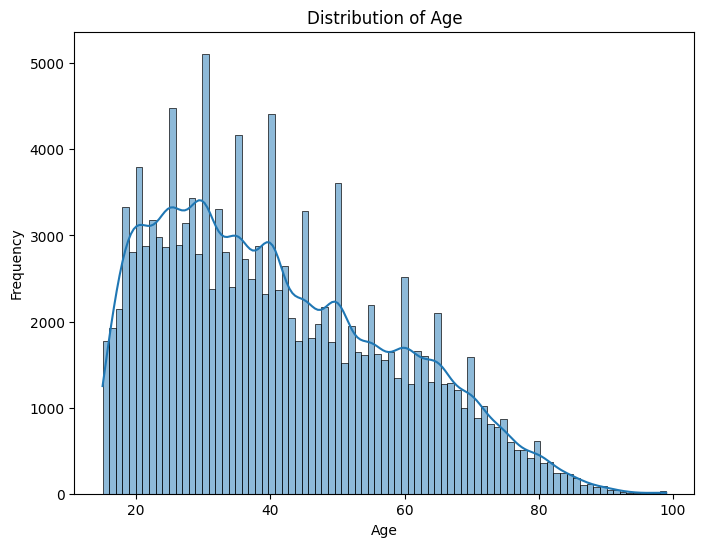

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(dff['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

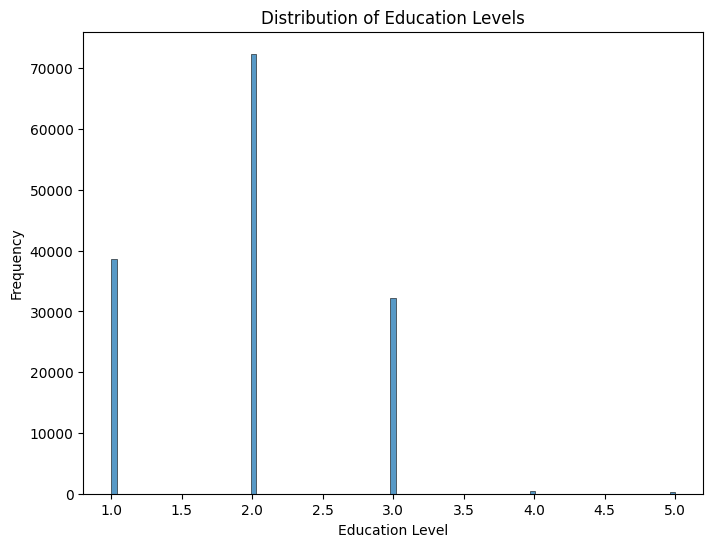

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(dff['educ'], kde=False) # Example: If 'educ' is categorical
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

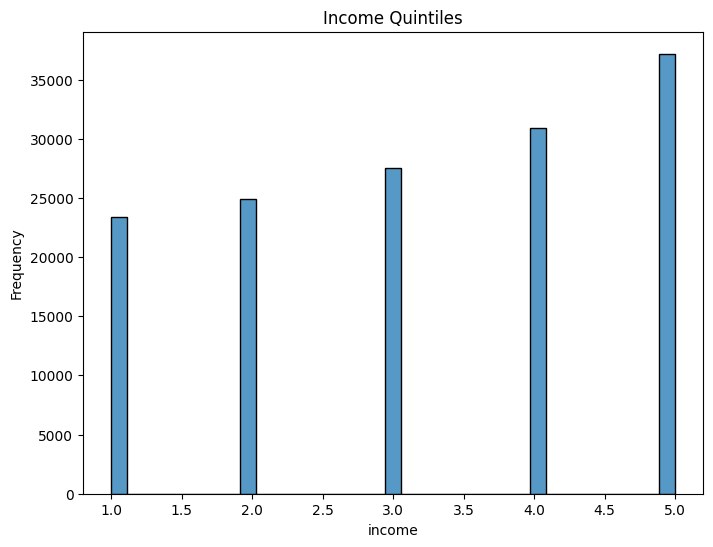

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(dff['inc_q'], kde=False) # Example: If 'educ' is categorical
plt.title('Income Quintiles')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.show()

C:\Users\GIM\AppData\Local\Temp\ipykernel_10320\3993712078.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="1= veryworried, 2=somewhat worried, 3=not worried, 4=not applicable, 5=don't know, 6=Refused", loc="upper right")


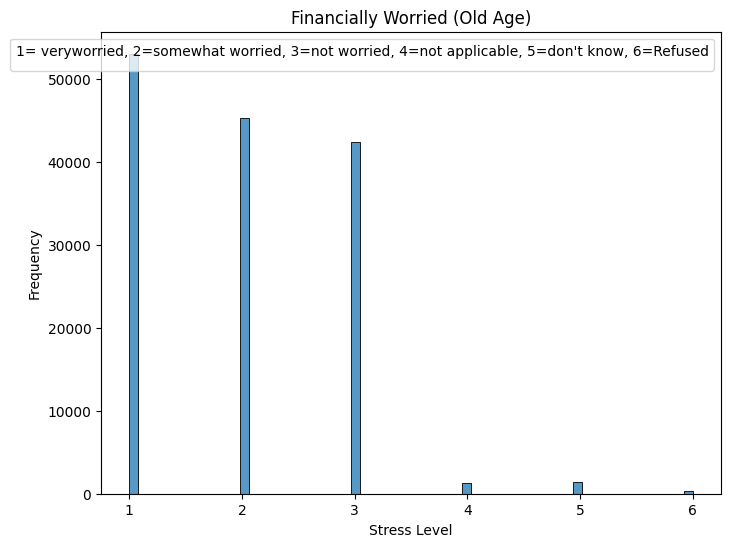

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(dff['fin44a'], kde=False) # Example: If 'educ' is categorical
plt.title('Financially Worried (Old Age)')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.legend(title="1= veryworried, 2=somewhat worried, 3=not worried, 4=not applicable, 5=don't know, 6=Refused", loc="upper right")
plt.show()

C:\Users\GIM\AppData\Local\Temp\ipykernel_10320\1875175662.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="1=Female, 2=Male")


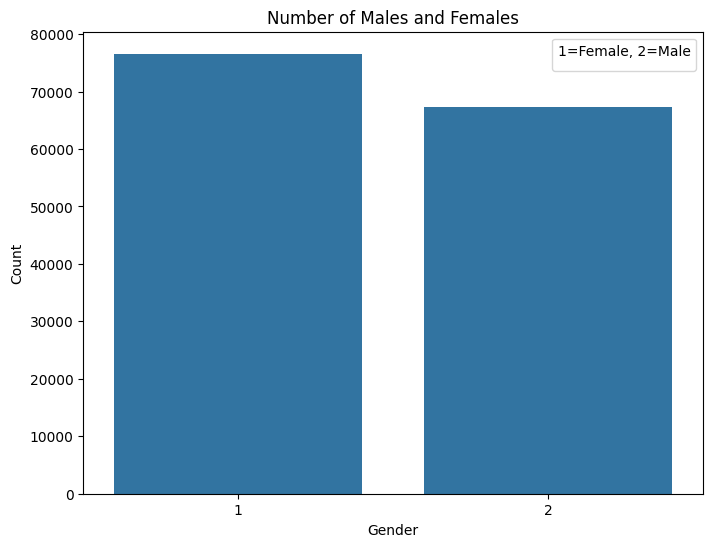

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='female', data=dff)  # Easier for count of categories
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="1=Female, 2=Male")
plt.show()

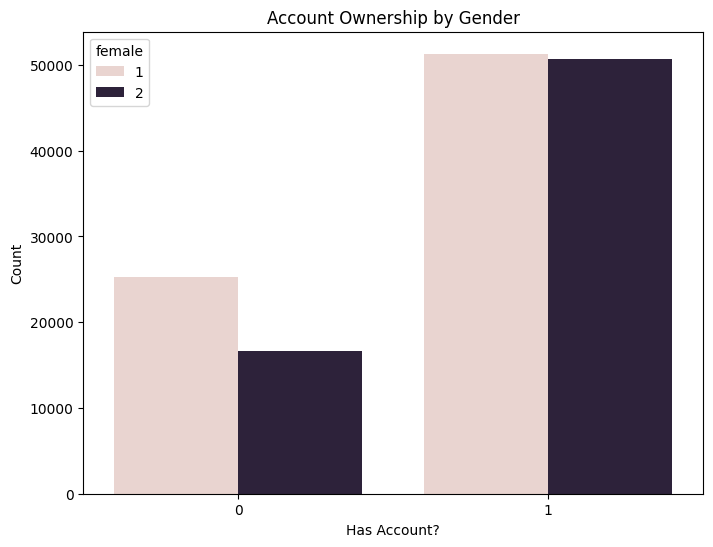

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='account', data=dff, hue='female')
plt.title('Account Ownership by Gender')
plt.xlabel('Has Account?')
plt.ylabel('Count')
plt.show()

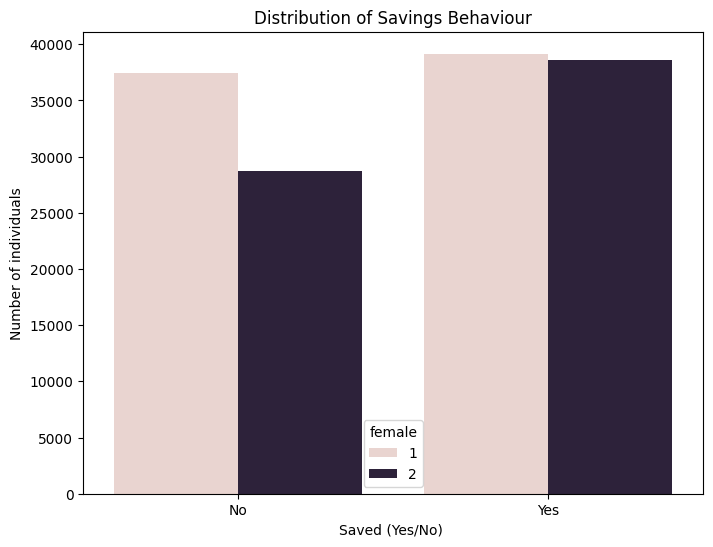

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='saved', data=dff, hue='female')
plt.title('Distribution of Savings Behaviour')
plt.xlabel('Saved (Yes/No) ')
plt.ylabel('Number of individuals')
plt.xticks([0,1],['No', 'Yes'])
plt.show()

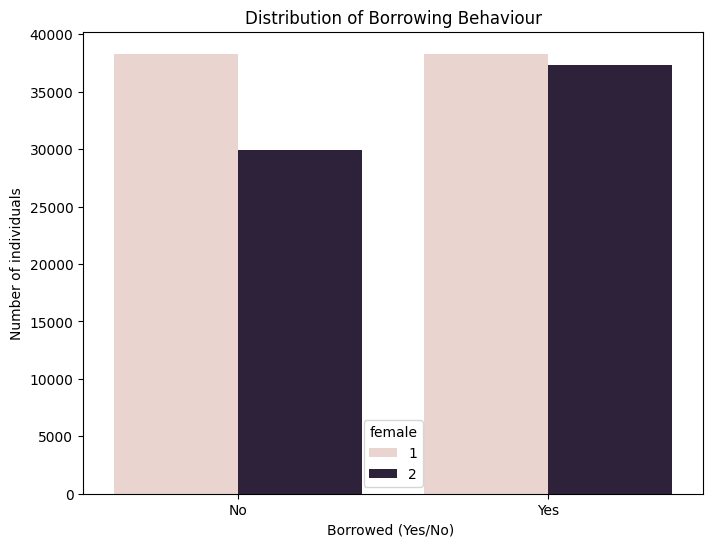

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='borrowed', data=dff, hue='female')
plt.title('Distribution of Borrowing Behaviour')
plt.xlabel('Borrowed (Yes/No) ')
plt.ylabel('Number of individuals')
plt.xticks([0,1],['No', 'Yes'])
plt.show()

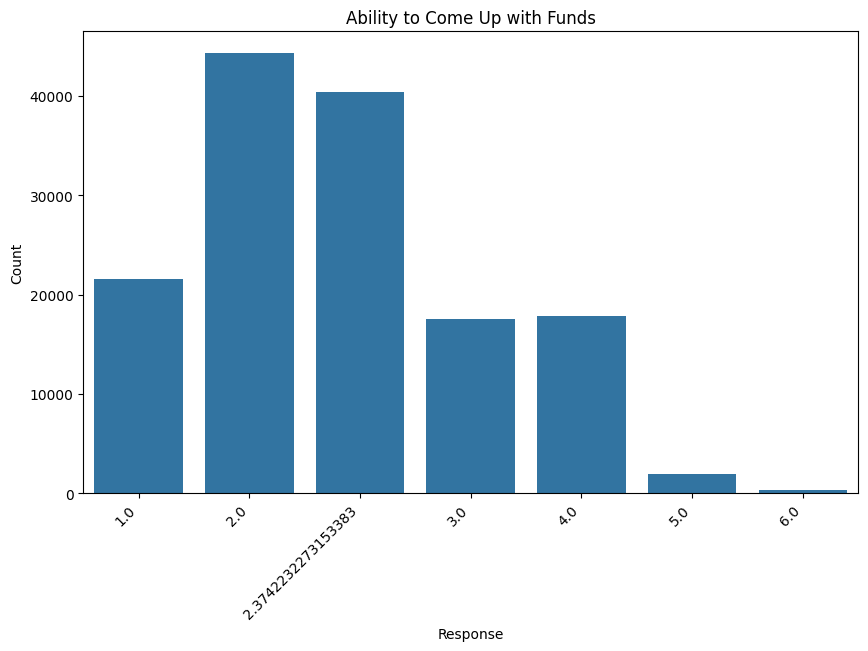

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fin45', data=dff)
plt.title('Ability to Come Up with Funds')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [23]:
!pip install scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


          account  educ_1    educ_2    educ_3  educ_4    educ_5
cluster                                                        
0        0.446330     1.0  0.000000  0.000000     0.0  0.000000
1        0.805584     0.0  0.690164  0.306404     0.0  0.003432
2        0.589873     0.0  0.000000  0.000000     1.0  0.000000


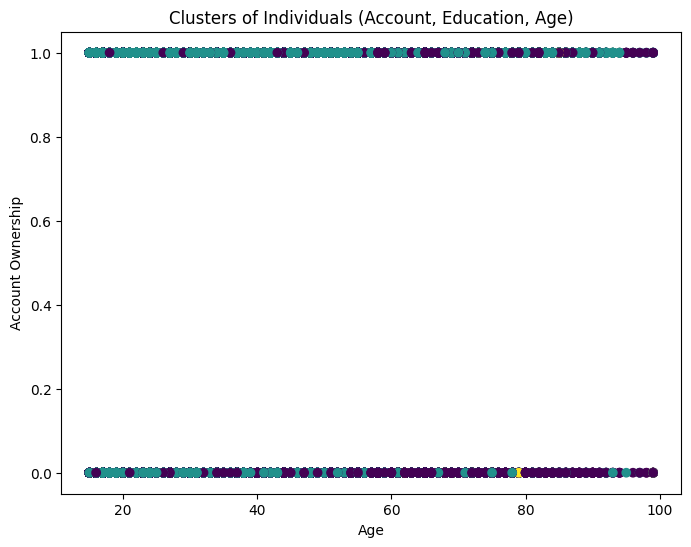

In [24]:
data = dff
dff = pd.DataFrame(data)

df = dff.copy()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
educ_encoded = encoder.fit_transform(df[['educ']])
educ_df = pd.DataFrame(educ_encoded, columns=encoder.get_feature_names_out(['educ']))
df = pd.concat([df, educ_df], axis=1) 
df.drop('educ', axis=1, inplace=True) 

X = df[['account'] + list(educ_df.columns)]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")  
df['cluster'] = kmeans.fit_predict(X_scaled)


print(df.groupby('cluster')[['account'] + list(educ_df.columns)].mean()) 


plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['account'], c=df['cluster'], cmap='viridis') 
plt.title('Clusters of Individuals (Account, Education, Age)')
plt.xlabel('Age')
plt.ylabel('Account Ownership')
plt.show()

C:\Users\GIM\AppData\Local\Temp\ipykernel_10320\234564392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dff['educ'], y=dff['account'], palette="coolwarm" )


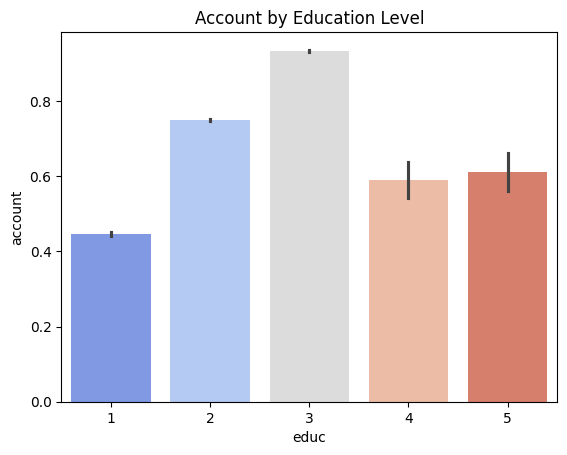

In [25]:
# Additional visualization (Bar plot to show account by education level)
sns.barplot(x=dff['educ'], y=dff['account'], palette="coolwarm" )
plt.title('Account by Education Level')
plt.show()

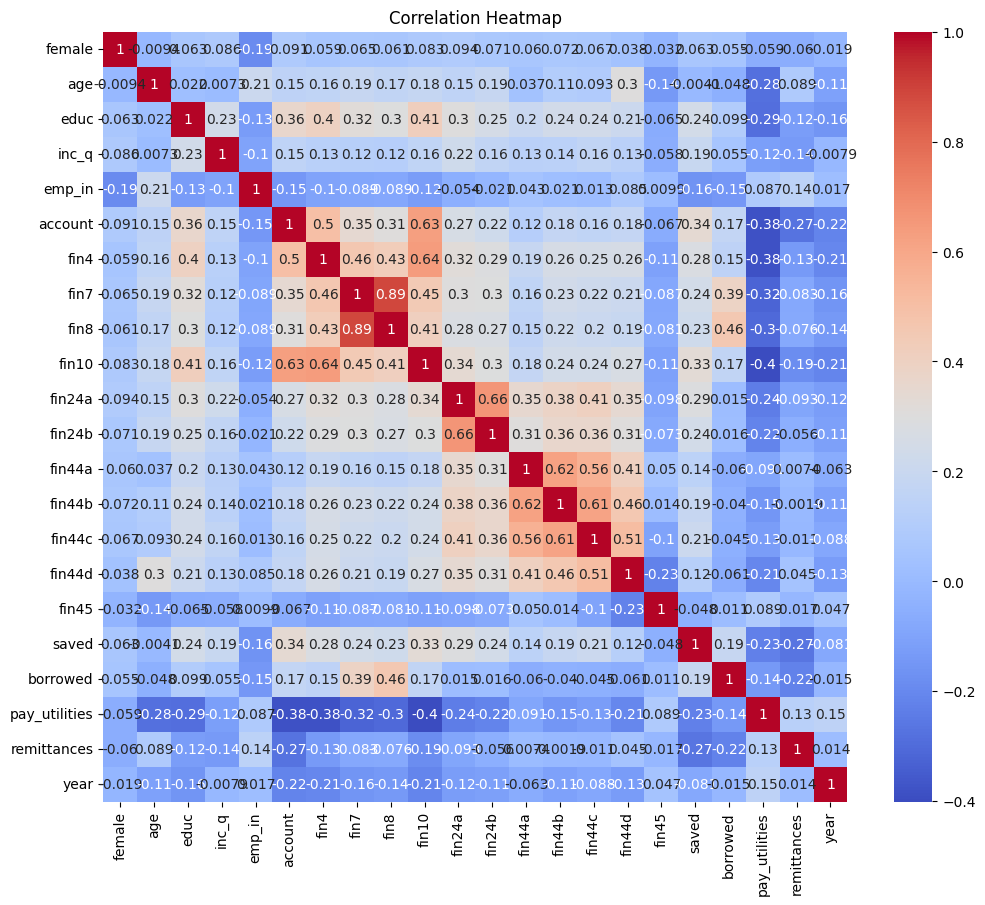

In [26]:
plt.figure(figsize=(12, 10))
corr_matrix = dff.corr(numeric_only=True)  # Calculate correlation matrix (numeric columns only)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


data = dff

bins = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data['age_group'] = data['age_group'].cat.codes

# 2.2: Female
dff['female'] = dff['female'].map({0: 0, 1: 1})


education_map = {
    1: 'primary',
    2: 'secondary',
    3: 'higher'
}
data['educ_level'] = data['educ'].map(education_map)
data['educ_level'] = data['educ_level'].astype('category').cat.codes


data['inc_q'] = data['inc_q'].astype('category').cat.codes


binary_cols = ['account', 'fin4', 'fin7', 'fin8', 'fin10', 'saved', 'borrowed', 'pay_utilities', 'remittances']
for col in binary_cols:
    data[col] = data[col].map({0: 0, 1: 1})


data['fin44a'] = data['fin44a'] / data['fin44a'].max()

data['fin45'] = data['fin45'].astype('category').cat.codes


data['year'] = data['year'].astype('category').cat.codes

data['fin45'] = data['fin45'].astype('category').cat.codes


data['financial_distress_score'] = (
    data['borrowed'].map({0: 0, 1: 1}).fillna(0) + 
    data['saved'].map({0: 1, 1: 0}).fillna(0) 
    (data['fin45'] == 0).astype(int).fillna(0) 
)


threshold = 2
data['financial_distress'] = (data['financial_distress_score'] >= threshold).astype(int)


print(data['financial_distress'].value_counts())


print(data[['borrowed', 'saved', 'fin45', 'financial_distress_score', 'financial_distress']].head())




X = data[[
    'age_group', 'female', 'educ_level', 'inc_q', 'account',
    'fin4', 'fin7', 'fin8', 'fin10', 'saved', 'borrowed',
    'pay_utilities', 'remittances', 'fin44a', 'fin45', 'year'
]]
y = data['financial_distress'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

financial_distress
0    102905
1     40982
Name: count, dtype: int64
   borrowed  saved  fin45  financial_distress_score  financial_distress
0         1      0      0                         3                   1
1         1      0      3                         2                   1
2         1      0      4                         2                   1
3         0      0      3                         1                   0
4         1      0      0                         3                   1
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20538
           1       1.00      1.00      1.00      8240

    accuracy                           1.00     28778
   macro avg       1.00      1.00      1.00     28778
weighted avg       1.00      1.00      1.00     28778


Feature Importances:
           Feature  Importance
10       borrowed    0.336767
9           saved    0.335318
14          fin45    0.255473
13         fin4

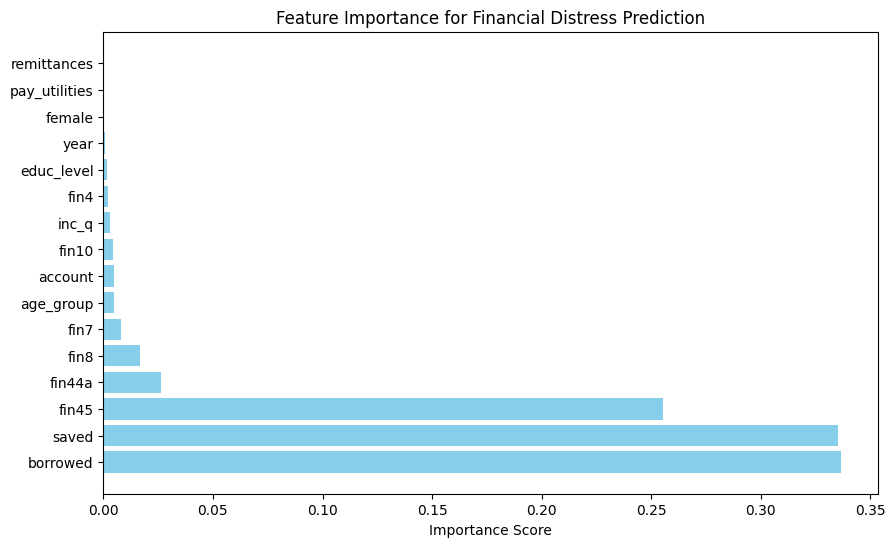

In [28]:
importance_df = feature_importance_df


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Financial Distress Prediction')
plt.show()

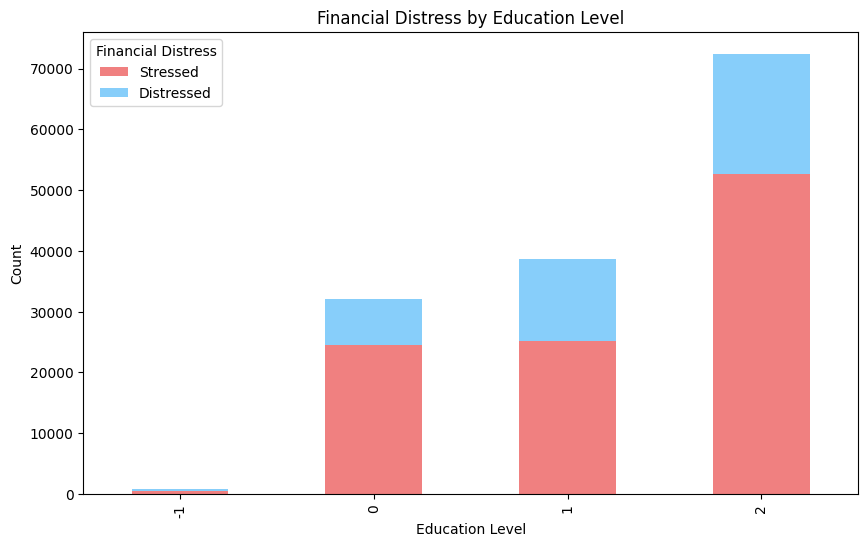

In [29]:
#making another variable combining education level and distress
category_counts = data.groupby(['educ_level', 'financial_distress']).size().unstack()

category_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightskyblue'])
plt.title('Financial Distress by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Financial Distress', labels=['Stressed', 'Distressed'])
plt.show()

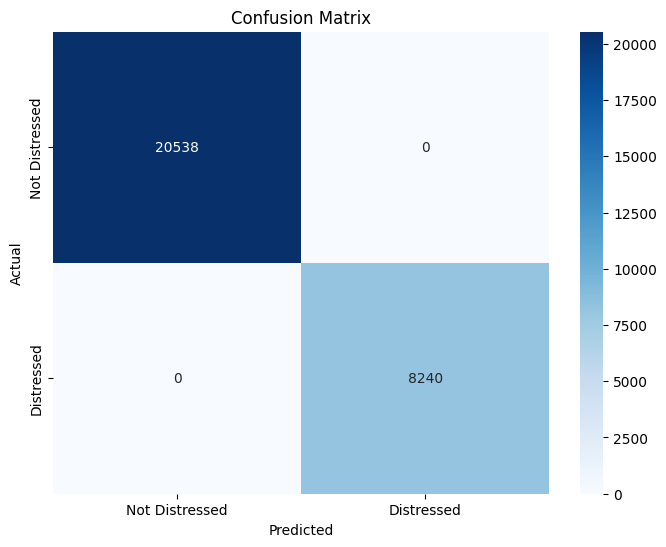

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Distressed', 'Distressed'], yticklabels=['Not Distressed', 'Distressed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [31]:
!pip install keras
!pip install tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=25, batch_size=10, verbose=1)


y_pred = (model.predict(X_test) > 0.5).astype("int32") 

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7141 - loss: 0.6122
Epoch 2/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7171 - loss: 0.5957
Epoch 3/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7132 - loss: 0.5993
Epoch 4/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7160 - loss: 0.5968
Epoch 5/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7177 - loss: 0.5951
Epoch 6/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7159 - loss: 0.5969
Epoch 7/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7166 - loss: 0.5962
Epoch 8/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7147 - loss: 0.5979
Epoch 9/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7165 - loss: 0.5963
Epoch 10/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7144 - loss: 0.5982
Epoch 11/25
11511/11511 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7159 - loss: 0.59

C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [34]:
y_prob=model.predict(X_test)
y_pred=(y_prob > 0.5).astype("int32")

risk_scores=y_prob.flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step
Accuracy: 0.7136701647091528
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     20538
           1       0.00      0.00      0.00      8240

    accuracy                           0.71     28778
   macro avg       0.36      0.50      0.42     28778
weighted avg       0.51      0.71      0.59     28778



C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [35]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   female                    76585 non-null   float64
 1   age                       143887 non-null  float64
 2   educ                      143887 non-null  int64  
 3   inc_q                     143887 non-null  int8   
 4   emp_in                    143887 non-null  float64
 5   account                   143887 non-null  int64  
 6   fin4                      143887 non-null  int64  
 7   fin7                      143887 non-null  int64  
 8   fin8                      143887 non-null  int64  
 9   fin10                     143887 non-null  int64  
 10  fin24a                    143887 non-null  float64
 11  fin24b                    143887 non-null  float64
 12  fin44a                    143887 non-null  float64
 13  fin44b                    143887 non-null  i

In [52]:
FEATURE_NAMES = [
    'age_group', 'female', 'educ_level', 'inc_q', 'account',
    'fin4', 'fin7', 'fin8', 'fin10', 'saved', 'borrowed',
    'pay_utilities', 'remittances', 'fin44a', 'fin45', 'year'
]


test_values_low_risk = {
    'age_group': 2.0, 'female': 0.0, 'educ_level': 2.0, 'inc_q': 4.0, 'account': 1.0,
    'fin4': 1.0, 'fin7': 1.0, 'fin8': 1.0, 'fin10': 1.0, 'saved': 1.0, 'borrowed': 0.0,
    'pay_utilities': 1.0, 'remittances': 0.0, 'fin44a': 0.2, 'fin45': 4.0, 'year': 1.0
}


test_values_moderate_risk = {
    'age_group': 1.0, 'female': 1.0, 'educ_level': 1.0, 'inc_q': 2.0, 'account': 1.0,
    'fin4': 0.0, 'fin7': 0.0, 'fin8': 0.0, 'fin10': 0.0, 'saved': 0.0, 'borrowed': 1.0,
    'pay_utilities': 1.0, 'remittances': 0.0, 'fin44a': 0.6, 'fin45': 2.0, 'year': 1.0
}


test_values_high_risk = {
    'age_group': 0.0, 'female': 1.0, 'educ_level': 0.0, 'inc_q': 0.0, 'account': 0.0,
    'fin4': 0.0, 'fin7': 0.0, 'fin8': 0.0, 'fin10': 0.0, 'saved': 0.0, 'borrowed': 1.0,
    'pay_utilities': 0.0, 'remittances': 1.0, 'fin44a': 0.9, 'fin45': 0.0, 'year': 0.0
}


def predict_financial_distress(test_data, model, scaler, feature_names):
    test_array = np.array([test_data[feature] for feature in feature_names]).reshape(1, -1)
    

    test_array_scaled = scaler.transform(test_array)


    prediction = model.predict(test_array_scaled)

    
    return prediction


test_values_low_risk = {k: np.float64(v) for k, v in test_values_low_risk.items()}
test_values_moderate_risk = {k: np.float64(v) for k, v in test_values_moderate_risk.items()}
test_values_high_risk = {k: np.float64(v) for k, v in test_values_high_risk.items()}


prediction_low = predict_financial_distress(test_values_low_risk, model, scaler, FEATURE_NAMES)
prediction_moderate = predict_financial_distress(test_values_moderate_risk, model, scaler, FEATURE_NAMES)
prediction_high = predict_financial_distress(test_values_high_risk, model, scaler, FEATURE_NAMES)

print("Prediction for low-risk individual:", prediction_low)
print("Prediction for moderate-risk individual:", prediction_moderate)
print("Prediction for high-risk individual:", prediction_high)


prediction = prediction_high[0][0] 

if prediction >= 0.7:  
    alert_message = "High Risk: There is a significant likelihood of financial distress.  Consider taking immediate action to improve your financial situation."
elif prediction >= 0.4:
    alert_message = "Moderate Risk: There is a moderate risk of financial distress.  Monitor your finances closely and consider making adjustments as needed."
else:
    alert_message = "Low Risk: The risk of financial distress appears to be low at this time."

print(alert_message)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\GIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for low-risk individual: [[0.2828166]]
Prediction for moderate-risk individual: [[0.2828166]]
Prediction for high-risk individual: [[0.2828166]]
Low Risk: The risk of financial distress appears to be low at this time.


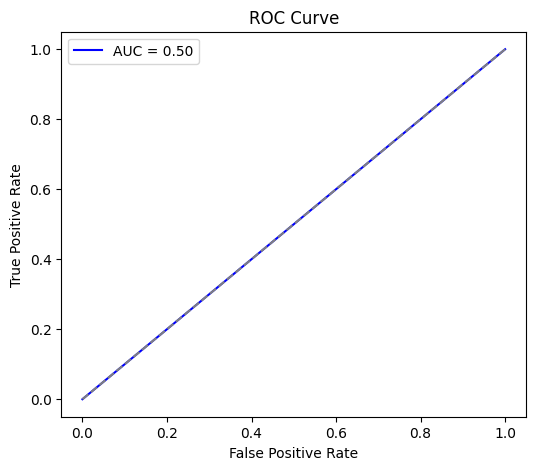

In [53]:
from sklearn.metrics import roc_curve, auc
#Y_probs = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray") # Random classifier baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()